In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv")

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [9]:
df.shape

(17000, 9)

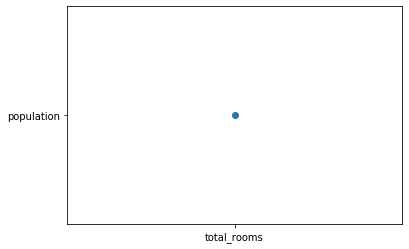

In [11]:
#Here target variable is population, which is continuous variable. 
#Hence, It is a Regression problem. So, We are performing Linear Regression.

#making train dataset
import matplotlib.pyplot as plt
plt.scatter('total_rooms', 'population')

In [13]:
#making train dataset

train=df[0:16999]

In [14]:
#making test dataset

test=df[17000:]

In [15]:
x_train=train.drop('total_rooms',axis=1)

In [16]:
y_train=train['total_rooms']

In [17]:
x_test=train.drop('total_rooms',axis=1)

In [18]:
true_p=test['total_rooms']

In [19]:
#importing the Linear Regression

from sklearn.linear_model import LinearRegression

In [20]:
# create an object

lreg=LinearRegression()

In [21]:
#fit the model

lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#to avoid the above errors, create dummies

x_train=pd.get_dummies(x_train)

In [23]:
x_train.shape

(16999, 8)

In [24]:
x_test=pd.get_dummies(x_test)

In [25]:
# To predict on the test data set

lreg.predict(x_test)

array([5595.0645544 , 8331.42254165,  682.64328313, ..., 2416.65052923,
       2824.25993805, 2630.6201776 ])

In [26]:
pred=lreg.predict(x_test)

In [1]:
# performance of our model - r2

lreg.score(x_test,true_p)

NameError: name 'lreg' is not defined

In [34]:
lreg.score(x_train,y_train)

0.9201755243862222

In [32]:
np.sqrt(np.mean(np.power((np.array(true_p)-np.array(pred)),2)))

ValueError: operands could not be broadcast together with shapes (0,) (16999,) 